<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C5/C5.html"><img src="../data/C5_nav.png" width="100"  style="float:right;" alt="C5"></a>
<h1>Chord Recognition Evaluation</h1> 
</div>

<br/>

<p>
Following Section 5.2.2 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we introduce in this notebook strategies to evaluate the performance of chord recognition algorithms.

</p> 

## Introduction

In order to evaluate the quality of a chord recognition procedure, a general approach is to compare the computed result against a **reference annotation**. However, such an evaluation often gives rise to various questions.

* How should the agreement between the computed result and the reference annotation
be quantified? 
* Is the reference annotation well defined? Is it reliable?
* Are the model assumptions in the formalization of the chord recognition task appropriate? 
* To what extent do violations of these assumptions influence the final result?

For all these questions there are no definite answers, and evaluation results need to be taken with care. Still, quantitative evaluations are useful indicators. They generally reflect the overall performance of automated procedures and give valuable insights into the characteristics 
of the underlying music data.

In this notebook, we introduce a simple evaluation approach. To this end, we assume that there exists a **reference annotation**, which is also often called **ground truth**. Typically, such a reference annotation is generated by music experts, often based on a score representation. In general, however, no well-defined ground truth exists, and even music experts may disagree on how to annotate a given piece of music. Furthermore, the annotations may depend on the employed temporal granularity (e.g., note, beat, measure, or phrase level). Furthermore, one needs to adapt the manual annotations to make them comparable with the computed results. 

## Accuracy, Precision, Recall, F-Measure

Keeping these issues in mind, we now introduce a simple evaluation measure. Recall that, given a **chroma sequence** $X=(x_1,x_2,\ldots,x_N)$ and a set 

$$
  \Lambda := \{\mathbf{C},\mathbf{C}^\sharp,\ldots,\mathbf{B},\mathbf{Cm},\mathbf{Cm^\sharp},\ldots,\mathbf{Bm}\} 
$$

of possible **chord labels**, the output of our [template-based chord recognition](../C5/C5S2_ChordRec_Templates.html) procedure consists of a chord label $\lambda_{n}\in\Lambda$ for each frame $n\in[1:N]$. Furthermore, we assume that we are given a reference annotation that is also specified in a frame-wise fashion $\lambda^\mathrm{Ref}_{n}\in\Lambda$ for $n\in[1:N]$

However, we do not want to assume that every frame needs to be annotated. For example, if the recording starts with silence or ends with applause, there is no meaningful chord annotation for these sections, and the corresponding frames should be left unconsidered in the evaluation. To model this, we extend our label set by an additional symbol $\mathbf{N}$, which stands for **non-chord label**. Thus, our new label set has $25$ elements and is defined as:

\begin{equation}
  \Lambda':= \Lambda \cup  \{\mathbf{N}\}
\end{equation}

In the following, the reference annotation is given by labels $\lambda^\mathrm{Ref}_{n}\in\Lambda'$ for $n\in[1:N]$. Furthermore, we assume $\lambda_{n}\in\Lambda'$ for $n\in[1:N]$, i.e., our chord recognizer may also output the non-chord label (e.g., in the case that all similarity values between a chroma frame and the templates are below a certain threshold). The evaluation can then be performed frame-wise by comparing the computed labels $\lambda_{n}$ with the reference labels $\lambda^\mathrm{Ref}_{n}$. For a given frame $n\in[1:N]$, we say that a label predicted by the chord recognition approach is **correct** if $\lambda_{n}=\lambda^\mathrm{Ref}_{n}$, otherwise it is considered **incorrect**. The **accuracy** $\mathrm{A}$ is then defined as the proportion of correctly predicted labels:

$$
  \mathrm{A} = \frac{\big|\{n\in[1:N]: \lambda_{n}=\lambda^\mathrm{Ref}_{n} \} \big|}{N}.
$$

In the context of [music structure analysis](../C4/C4.html), we introduced in the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html) evaluation measures that are used in general **information retrieval**. As an alternative to our accuracy measure, we now adapt these notions to our chord recognition scenario. First, we define the set of items to be $\mathcal{I}=[1:N]\times \Lambda$. In particular, the non-chord label $\mathbf{N}$ is left unconsidered. Then, 

$$
\mathcal{I}^\mathrm{Ref}_+:=\big\{(n,\lambda^\mathrm{Ref}_{n})\in\mathcal{I} : n\in[1:N]\big\}
$$

are the **positive** (or **relevant items**) and 

$$
\mathcal{I}^\mathrm{Est}_+:=\big\{(n,\lambda_{n})\in\mathcal{I} : n\in[1:N]\big\}
$$ 

are the items **estimated as positive** (or **retrieved items**). With these notions, an item $(n,\lambda_{n})$ is called a **true positive** (TP) in the case that the label is correct (i.e., $\lambda_{n}=\lambda^\mathrm{Ref}_{n}$). Otherwise, $(n,\lambda_{n})$ is called a **false positive** (FP) and $(n,\lambda^\mathrm{Ref}_{n})$ a **false negative** (FN). All other items in $\mathcal{I}$ are called **true negative**. With these notions, one can define the standard **precision** (P), **recall** (R), and **F-measure** (F):

$$
   \mathrm{P} = \frac{\#\mathrm{TP}}{\#\mathrm{TP}+\#\mathrm{FP}}, \quad
   \mathrm{R} = \frac{\#\mathrm{TP}}{\#\mathrm{TP}+\#\mathrm{FN}}, \quad
   \mathrm{F} = \frac{2\cdot \mathrm{P}\cdot \mathrm{R}}{\mathrm{P} + \mathrm{R}}.
$$

For further explanations, we refer to the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html). In the way we have formulated our chord recognition problem so far, we have exactly one label per frame in the reference as well as in the estimation. From this follows that $\#\mathrm{FP}=\#\mathrm{FN}$ and that the definition of accuracy coincides with precision, recall, and F-measure. However, when modeling the problem in a different way (e.g., allowing for frames that are not annotated), this does not hold any longer. We will discuss such a case later when considering 'non-chord' labels.  

## Beatles Example

To illustrate the definitions, we again use the first measures of the Beatles song "Let It Be" and apply the [template-based chord recognition](../C5/C5S2_ChordRec_Templates.html). The following figure shows a score representation along with two different chord annotations provided by music experts. The first annotation is specified on the half-measure level (every two quarter notes) and only used the $24$ major and minor triads. The second annotation is not only specified on a finer temporal level, but also allows more chord types including [seventh chords](../C5/C5S1_Chords.html). In the following, we use the first simplistic annotation as reference, which is temporally adjusted to match the music recording.

<img src="../data/C5/FMP_C5_F16_score.png" width="600px" align="left" alt="FMP_C5_F16_score.png">

<br clear="all" />

<audio style="width: 400px; margin-top:0.3cm;" src="../data/C5/FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.mp3" type="audio/mpeg" controls="controls"></audio>

We start by converting the music recording into a sequence of [chroma vectors](../C3/C3S1_SpecLogFreq-Chromagram.html). Then, we apply the [template-based chord recognition approach](../C5/C5S2_ChordRec_Templates.html) to estimate a chord label for each time frame. The result is visualized in form of a binary time&ndash;chord representations.

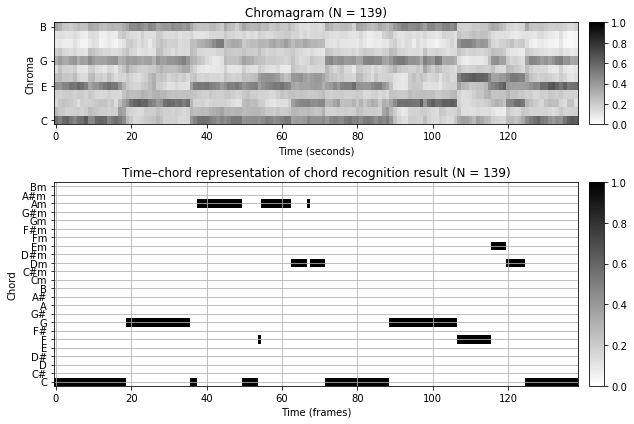

In [1]:
import os
import copy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

import sys
sys.path.append('..')
import libfmp.b
import libfmp.c4
import libfmp.c5
import libfmp.c7
%matplotlib inline

# Compute chromagram
fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original.wav')
N = 4096
H = 2048
X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=100, version='IIR')
#X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N, H=H, version='CQT')

# Chord recognition
chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
chord_labels = libfmp.c5.get_chord_labels()

#Plot
fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [1, 2]}, figsize=(9, 6))

title = 'Chromagram (N = %d)' % X.shape[1]
libfmp.b.plot_chromagram(X, Fs=1, ax=[ax[0, 0], ax[0, 1]],
                         chroma_yticks = [0, 4, 7, 11], clim=[0, 1], cmap='gray_r',
                         title=title, ylabel='Chroma', colorbar=True)

title = 'Time–chord representation of chord recognition result (N = %d)' % X.shape[1]
libfmp.b.plot_matrix(chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                     title=title, ylabel='Chord', xlabel='Time (frames)')
ax[1, 0].set_yticks(np.arange(len(chord_labels)))
ax[1, 0].set_yticklabels(chord_labels)
ax[1, 0].grid()
plt.tight_layout()

Next, we read the annotation file that contains reference annotations needed for our evaluation. In our scenario, these annotations are given in the form of labeled segments, each specified as a triple $(s,t,\lambda)$  with start and end time $s,t\in\mathbb{R}$ (given in seconds) and label $\lambda$. To apply our frame-wise evaluation measures, we need some preparation:

* First, we need to convert the **segment-based annotation** into a **frame-based label sequence** adapted to the feature rate used for the chroma sequence. This step is not trivial, since the time grid introduced by sampling may not be conform with segment boundaries.
* Second, one may need to convert the labels used in the annotation file to match the label conventions used in the automated approach. This step is often problematic, in particular when the reference annotation is given on a different semantic level (e.g., using more than the $24$ major and minor triads).

Following the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html), we provide in the next code cell such an adaption function, which reads the original annotation file and converts it into various formats:

* Segment-based annotation with segments (given in seconds)
* Segment-based annotation with segments (given in indices)
* Label sequence (specified on the frame level)
* Encoding of label sequence as segment-based annotation (given in indices) 
* Encoding of label sequence in form of a binary time&ndash;chord representation

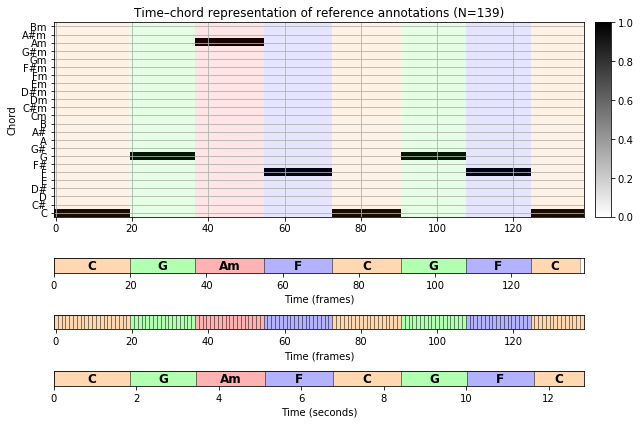

In [2]:
def convert_chord_label(ann):
    """Replace for segment-based annotation in each chord label the string ':min' by 'm'
    and convert flat chords into sharp chords using enharmonic equivalence

    Notebook: C5/C5S2_ChordRec_Eval.ipynb

    Args:
        ann (list): Segment-based annotation with chord labels

    Returns:
        ann_conv (list): Converted segment-based annotation with chord labels
    """
    ann_conv = copy.deepcopy(ann)

    for k in range(len(ann)):
        ann_conv[k][2] = ann_conv[k][2].replace(':min', 'm')
        ann_conv[k][2] = ann_conv[k][2].replace('Db', 'C#')
        ann_conv[k][2] = ann_conv[k][2].replace('Eb', 'D#')
        ann_conv[k][2] = ann_conv[k][2].replace('Gb', 'F#')
        ann_conv[k][2] = ann_conv[k][2].replace('Ab', 'G#')
        ann_conv[k][2] = ann_conv[k][2].replace('Bb', 'A#')
    return ann_conv

def convert_sequence_ann(seq, Fs=1):
    """Convert label sequence into segment-based annotation

    Notebook: C5/C5S2_ChordRec_Eval.ipynb

    Args:
        seq (list): Label sequence
        Fs (scalar): Feature rate (Default value = 1)

    Returns:
        ann (list): Segment-based annotation for label sequence
    """
    ann = []
    for m in range(len(seq)):
        ann.append([(m-0.5) / Fs, (m+0.5) / Fs, seq[m]])
    return ann

def convert_chord_ann_matrix(fn_ann, chord_labels, Fs=1, N=None, last=False):
    """Convert segment-based chord annotation into various formats

    Notebook: C5/C5S2_ChordRec_Eval.ipynb

    Args:
        fn_ann (str): Filename of segment-based chord annotation
        chord_labels (list): List of chord labels
        Fs (scalar): Feature rate (Default value = 1)
        N (int): Number of frames to be generated (by cutting or extending).
            Only enforced for ann_matrix, ann_frame, ann_seg_frame (Default value = None)
        last (bool): If 'True' uses for extension last chord label, otherwise uses nonchord label 'N'
            (Default value = False)

    Returns:
        ann_matrix (np.ndarray): Encoding of label sequence in form of a binary time-chord representation
        ann_frame (list): Label sequence (specified on the frame level)
        ann_seg_frame (list): Encoding of label sequence as segment-based annotation (given in indices)
        ann_seg_ind (list): Segment-based annotation with segments (given in indices)
        ann_seg_sec (list): Segment-based annotation with segments (given in seconds)
    """
    ann_seg_sec, _ = libfmp.c4.read_structure_annotation(fn_ann)
    ann_seg_sec = convert_chord_label(ann_seg_sec)
    ann_seg_ind, _ = libfmp.c4.read_structure_annotation(fn_ann, Fs=Fs, index=True)
    ann_seg_ind = convert_chord_label(ann_seg_ind)

    ann_frame = libfmp.c4.convert_ann_to_seq_label(ann_seg_ind)
    if N is None:
        N = len(ann_frame)
    if N < len(ann_frame):
        ann_frame = ann_frame[:N]
    if N > len(ann_frame):
        if last:
            pad_symbol = ann_frame[-1]
        else:
            pad_symbol = 'N'
        ann_frame = ann_frame + [pad_symbol] * (N-len(ann_frame))
    ann_seg_frame = convert_sequence_ann(ann_frame, Fs=1)

    num_chords = len(chord_labels)
    ann_matrix = np.zeros((num_chords, N))
    for n in range(N):
        label = ann_frame[n]
        # Generates a one-entry only for labels that are contained in "chord_labels"
        if label in chord_labels:
            label_index = chord_labels.index(label)
            ann_matrix[label_index, n] = 1
    return ann_matrix, ann_frame, ann_seg_frame, ann_seg_ind, ann_seg_sec

# Annotations
fn_ann = os.path.join('..', 'data', 'C5', 'FMP_C5_F01_Beatles_LetItBe-mm1-4_Original_Chords_simplified.csv')
chord_labels = libfmp.c5.get_chord_labels(ext_minor='m', nonchord=False)
N_X = X.shape[1]
ann_matrix, ann_frame, ann_seg_frame, ann_seg_ind, ann_seg_sec = convert_chord_ann_matrix(fn_ann, chord_labels, 
                                                                           Fs=Fs_X, N=N_X, last=True)

color_ann = {'C': [1, 0.5, 0, 1], 'G': [0, 1, 0, 1], 
             'Am': [1, 0, 0, 1], 'F': [0, 0, 1, 1], 'N': [1, 1, 1, 1]}

# Plot
cmap = libfmp.b.compressed_gray_cmap(alpha=1, reverse=False)
fig, ax = plt.subplots(4, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [4, 0.3, 0.3, 0.3]}, 
                       figsize=(9, 6))

libfmp.b.plot_matrix(ann_matrix, ax=[ax[0, 0], ax[0, 1]], Fs=1, 
                     title='Time–chord representation of reference annotations (N=%d)' % ann_matrix.shape[1],
                     ylabel='Chord', xlabel='')
ax[0, 0].set_yticks(np.arange( len(chord_labels) ))
ax[0, 0].set_yticklabels(chord_labels)
libfmp.b.plot_segments_overlay(ann_seg_frame, ax=ax[0, 0], 
                               print_labels=False, colors=color_ann, alpha=0.1)
ax[0, 0].grid()
libfmp.b.plot_segments(ann_seg_ind, ax=ax[1, 0], time_label='Time (frames)', time_max=N_X,
                       colors=color_ann,  alpha=0.3)
ax[1, 1].axis('off')
libfmp.b.plot_segments(ann_seg_frame, ax=ax[2, 0], time_label='Time (frames)', 
                       colors=color_ann,  alpha=0.3, print_labels=False)
ax[2, 1].axis('off')
libfmp.b.plot_segments(ann_seg_sec, ax=ax[3, 0], time_max=x_dur, time_label='Time (seconds)',
                       colors=color_ann,  alpha=0.3)
ax[3, 1].axis('off')
plt.tight_layout()

We now implement the evaluation measures and apply them to our Beatles example. Based on a **time&ndash;chord grid** (corresponding to the set $\mathcal{I}$ of items), the visualization shows the TP-, FP-, and FN-items in a color-coded form.

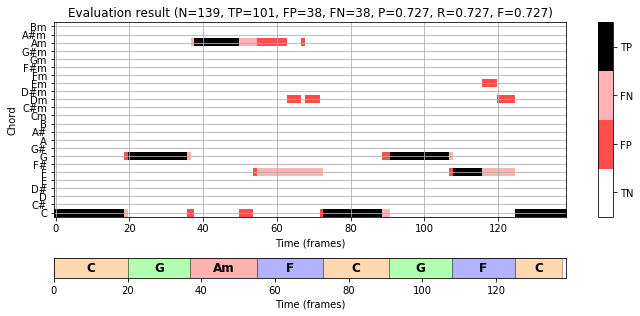

In [3]:
def compute_eval_measures(I_ref, I_est):
    """Compute evaluation measures including precision, recall, and F-measure

    Notebook: C5/C5S2_ChordRec_Eval.ipynb

    Args:
        I_ref (np.ndarray): Reference set of items
        I_est (np.ndarray): Set of estimated items

    Returns:
        P (float): Precision
        R (float): Recall
        F (float): F-measure
        num_TP (int): Number of true positives
        num_FN (int): Number of false negatives
        num_FP (int): Number of false positives
    """
    assert I_ref.shape == I_est.shape, "Dimension of input matrices must agree"
    TP = np.sum(np.logical_and(I_ref, I_est))
    FP = np.sum(I_est > 0, axis=None) - TP
    FN = np.sum(I_ref > 0, axis=None) - TP
    P = 0
    R = 0
    F = 0
    if TP > 0:
        P = TP / (TP + FP)
        R = TP / (TP + FN)
        F = 2 * P * R / (P + R)
    return P, R, F, TP, FP, FN

def plot_matrix_chord_eval(I_ref, I_est, Fs=1, xlabel='Time (seconds)', ylabel='Chord',
                           title='', chord_labels=None, ax=None, grid=True, figsize=(9, 3.5)):
    """Plots TP-, FP-, and FN-items in a color-coded form in time–chord grid

    Notebook: C5/C5S2_ChordRec_Eval.ipynb

    Args:
        I_ref: Reference set of items
        I_est: Set of estimated items
        Fs: Feature rate (Default value = 1)
        xlabel: Label for x-axis (Default value = 'Time (seconds)')
        ylabel: Label for y-axis (Default value = 'Chord')
        title: Title of figure (Default value = '')
        chord_labels: List of chord labels used for vertical axis (Default value = None)
        ax: Array of axes (Default value = None)
        grid: If "True" the plot grid (Default value = True)
        figsize: Size of figure (if axes are not specified) (Default value = (9, 3.5))

    Returns:
        fig: The created matplotlib figure or None if ax was given.
        ax: The used axes
        im: The image plot
    """
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        ax = [ax]
    I_TP = np.sum(np.logical_and(I_ref, I_est))
    I_FP = I_est - I_TP
    I_FN = I_ref - I_TP
    I_vis = 3 * I_TP + 2 * I_FN + 1 * I_FP

    eval_cmap = colors.ListedColormap([[1, 1, 1], [1, 0.3, 0.3], [1, 0.7, 0.7], [0, 0, 0]])
    eval_bounds = np.array([0, 1, 2, 3, 4])-0.5
    eval_norm = colors.BoundaryNorm(eval_bounds, 4)
    eval_ticks = [0, 1, 2, 3]

    T_coef = np.arange(I_vis.shape[1]) / Fs
    F_coef = np.arange(I_vis.shape[0])
    x_ext1 = (T_coef[1] - T_coef[0]) / 2
    x_ext2 = (T_coef[-1] - T_coef[-2]) / 2
    y_ext1 = (F_coef[1] - F_coef[0]) / 2
    y_ext2 = (F_coef[-1] - F_coef[-2]) / 2
    extent = [T_coef[0] - x_ext1, T_coef[-1] + x_ext2, F_coef[0] - y_ext1, F_coef[-1] + y_ext2]

    im = ax[0].imshow(I_vis,  origin='lower', aspect='auto', cmap=eval_cmap, norm=eval_norm, extent=extent,
                      interpolation='nearest')
    if len(ax) == 2:
        cbar = plt.colorbar(im, cax=ax[1], cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
    elif len(ax) == 1:
        plt.sca(ax[0])
        cbar = plt.colorbar(im, cmap=eval_cmap, norm=eval_norm, boundaries=eval_bounds, ticks=eval_ticks)
    cbar.ax.set_yticklabels(['TN', 'FP', 'FN', 'TP'])
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].set_title(title)
    if chord_labels is not None:
        ax[0].set_yticks(np.arange(len(chord_labels)))
        ax[0].set_yticklabels(chord_labels)
    if grid is True:
        ax[0].grid()
    return fig, ax, im


P, R, F, TP, FP, FN = compute_eval_measures(ann_matrix, chord_max)

fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [2, 0.2]}, figsize=(9, 4.5))

title = 'Evaluation result (N=%d, TP=%d, FP=%d, FN=%d, P=%.3f, R=%.3f, F=%.3f)' % (N_X, TP, FP, FN, P,R,F)
plot_matrix_chord_eval(ann_matrix, chord_max, ax=[ax[0, 0], ax[0, 1]], Fs=1, 
                       title=title, ylabel='Chord', xlabel='Time (frames)', chord_labels=chord_labels)

libfmp.b.plot_segments(ann_seg_ind, ax=ax[1, 0], time_label='Time (frames)', time_max=N_X,
                       colors=color_ann,  alpha=0.3)
ax[1, 1].axis('off')
plt.tight_layout()
plt.show()

<img src="../data/C5/FMP_C5_F16_score.png" width="600px" align="left" alt="FMP_C5_F16_score.png">

<br clear="all" />

Let us have a closer look at this chord recognition result. Using a feature rate of roughly $10.8~\mathrm{Hz}$ we obtain $N=139$ frames. The annotations on the half-measure level are transferred to the physical time axis of the recording and further quantized to match the audio frames. For the evaluation measures, we obtain $\mathrm{P}=\mathrm{R}=\mathrm{F}=0.727$. Most of the incorrect labels occur for frames with **chord ambiguities** due to additional passing or suspended notes. This becomes clear when looking at the annotation of the finer level. For example, the chord $\mathbf{Fmaj7}$ in the second measure consists of the four pitch classes $\mathrm{F}$, $\mathrm{A}$, $\mathrm{C}$, and $\mathrm{E}$. Although musically close to $\mathbf{F}$, three of the four pitch classes also occur in the chord $\mathbf{Am}$. As a result, the automated procedure erroneously labeled some of these frames as $\mathbf{Am}$ (and some as $\mathbf{Dm}$). A second source for deviations are **transition regions** between chords, where the ending sound of one chord may be present in the same analysis window as the beginning sound of the next chord. For example, one encounters some misclassified frames in the transition from the chord $\mathbf{C}$ to the next chord $\mathbf{G}$ in the first measure.

## Non-Chord Labels

In our previous examples, we assumed that all frames of the music recording should be assigned to a chord label. In practice, this is not always meaningful. For example, in the case that the recording starts with silence or ends with applause, there is no meaningful chord annotation for these sections. In such cases, the corresponding frames should be left unconsidered in the evaluation. As already explained above, we can model this property by adding to our label set an additional symbol $\mathbf{N}$, which stands for **non-chord label**. Thus, in the case that there is no meaningful reference chord label for a given frame $n\in[1:N]$, we set  $\lambda^\mathrm{Ref}_{n}=\mathbf{N}$. Similarly, the chord recognizer may be modified to also output a non-chord label $\lambda_{n}=\mathbf{N}$ (e.g., in the case that all similarity values between a chroma feature and the templates are below a certain threshold). Recall that, in our evaluation measures based on precision, recall, and F-measure, we did not treat the non-chord label simply as an additional label. Rather, we **disregard** in our evaluation all items with a non-chord label. In other words, in the binary time&ndash;chord representations of the estimation or reference annotation there may be **gaps**, where certain frames are left without any chord label assigned. In this case, the precision, recall, and F-measure may yield different values. This is demonstrated by the following example, where we replace in the reference annotation the chord label $\mathbf{F}$ by the non-chord label $\mathbf{N}$. Note that, as a result, the estimations of all these frames are now regarded as incorrect, resulting in an increase of FP-items. At the same time, one has a decrease of TP- und FN-items.

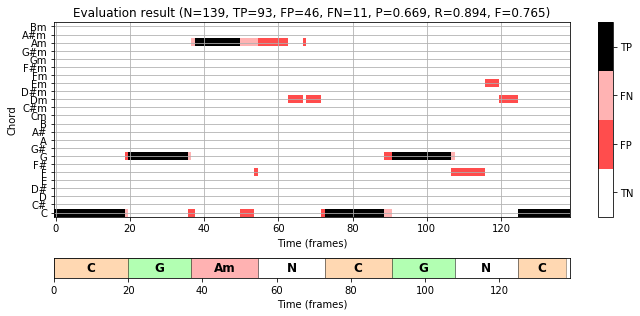

In [4]:
ann_matrix[5, :] = 0
ann_seg_ind[3][2] = 'N'
ann_seg_ind[6][2] = 'N'

P, R, F, TP, FP, FN = compute_eval_measures(ann_matrix, chord_max)


fig, ax = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                          'height_ratios': [2, 0.2]}, figsize=(9, 4.5))

title = 'Evaluation result (N=%d, TP=%d, FP=%d, FN=%d, P=%.3f, R=%.3f, F=%.3f)' % (N_X, TP, FP, FN, P,R,F)
plot_matrix_chord_eval(ann_matrix, chord_max, ax=[ax[0, 0], ax[0, 1]], Fs=1, 
                       title=title, ylabel='Chord', xlabel='Time (frames)', chord_labels=chord_labels)

libfmp.b.plot_segments(ann_seg_ind, ax=ax[1, 0], time_label='Time (frames)', time_max=N_X,
                       colors=color_ann,  alpha=0.3)
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

## Ambiguities in Chord Recognition

In the following, we address some of the most typical challenges one encounters in automated chord recognition. As the discussion of the Beatles example showed, different chords may be closely related by sharing some of their notes. Most of the misclassifications stem from **chord ambiguities** due to an **oversimplification of the chord models** (e.g., when only considering the $24$ major and minor triads). Such ambiguities are illustrated by the following figure.

<img src="../data/C5/FMP_C5_F17.png" width="400px" align="middle" alt="FMP_C5_F17">

The first example shows that the chord $\mathbf{C}$ shares two notes with the chords $\mathbf{Am}$, $\mathbf{Cm}$, and $\mathbf{Em}$, respectively, while the second example indicates that the chord  $\mathbf{Cmaj7}$ includes the chords $\mathbf{C}$ and $\mathbf{Em}$. The misclassification problem may be mitigated by extending the chord label set. For example, besides the major and minor triads, one may also introduce chord templates that correspond to major seventh chords. However, on the downside, increasing the number of possible chords also increases the confusion probability in the classification stage.

Another challenge stems from acoustic properties of the recorded music. In particular, **acoustic ambiguities** are introduced harmonic partials, which may have a significant influence on the results of a chord recognizer. For example, playing a single note $\mathrm{C3}$ on an instrument may result in substantial energy in the $\mathrm{G}$-band (third harmonic) or $\mathrm{E}$-band (fifth harmonic) in a resulting chromagram representation. This often results in some problem known as **major–minor confusion**.

Obviously, as discussed in the [FMP notebook on tuning and transposition](../C3/C3S1_TranspositionTuning.html), a deviation from the assumed center frequencies may introduce severe degradations in the quality of musically informed audio features such as chroma-based features. Such **tuning issues** may occur deliberately (e.g., when an orchestra used a different reference tuning), but may also be due to a modification of the playback speed or the application of other postprocessing operations.

Finally, one may also have to deal with **segmentation ambiguities** that are the result of broken chords. To illustrate this problem, let us consider the beginning of the famous $\mathrm{C}$ major prelude by Johann Sebastian Bach. 

<img src="../data/C5/FMP_C5_F20a.png" width="500px" align="left" alt="FMP_C5_20a">

<br clear="all" />

<audio style="width: 500px;" src="../data/C5/FMP_C5_F20_Bach_BWV846-mm1-4_Fischer.wav" type="audio/mpeg" controls="controls"></audio>

In this example, each half-measure starts with a bass note. Then the other notes join in and gradually build up the sound of an entire chord. Even though the notes are not played simultaneously, a broken chord as a whole may be perceived as a single harmonic unit. As for our basic **frame-level** chord recognition procedure, where we chop up the signal into short frames and classified each frame separately, such broken chords are problematic. In the following code cell, we illustrate the behavior of our chord recognizer showing the results for different window sizes used to compute the input chromagram.

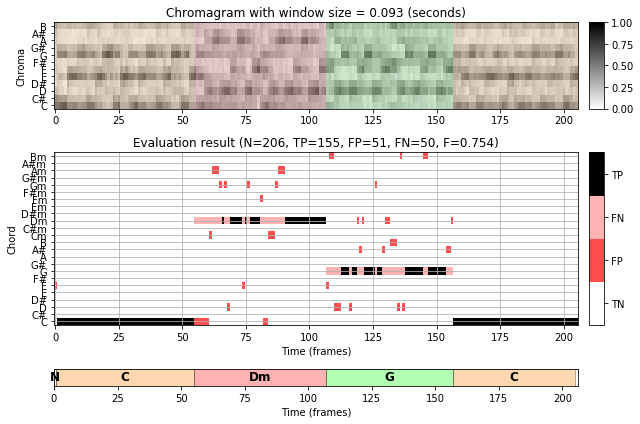

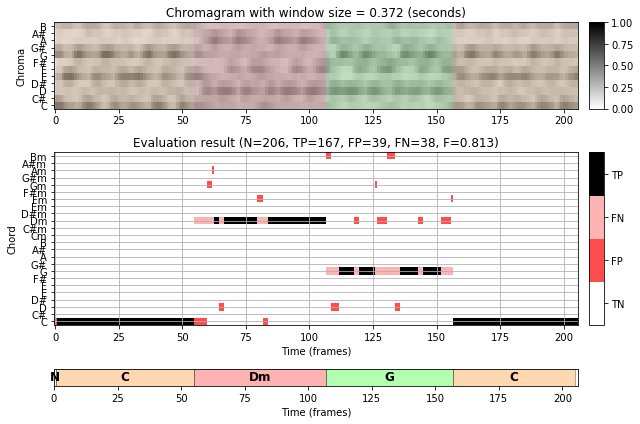

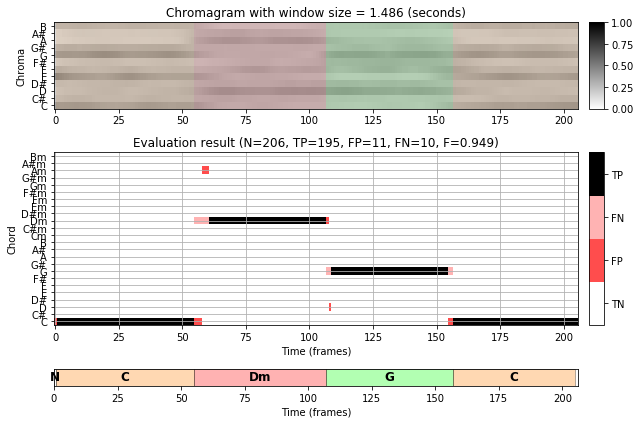

In [5]:
def experiment_chord_recognition_feature(fn_wav, fn_ann, color_ann, N_chroma, H_chroma, gamma=1,
                                         version='STFT'):
    # Compute chromagram
    X, Fs_X, x, Fs, x_dur = libfmp.c5.compute_chromagram_from_filename(fn_wav, N=N_chroma, H=H_chroma, 
                                                                       gamma=gamma, version=version)
    N_X = X.shape[1]

    # Chord recogntion
    chord_sim, chord_max = libfmp.c5.chord_recognition_template(X, norm_sim='max')
    chord_labels = libfmp.c5.get_chord_labels(nonchord=False)

    # Annotations
    chord_labels = libfmp.c5.get_chord_labels(ext_minor='m', nonchord=False)
    ann_matrix, ann_frame, ann_seg_frame, ann_seg_ind, ann_seg_sec = \
        convert_chord_ann_matrix(fn_ann, chord_labels, Fs=Fs_X, N=N_X, last=True)

    P, R, F, TP, FP, FN = compute_eval_measures(ann_matrix, chord_max)

    fig, ax = plt.subplots(3, 2, gridspec_kw={'width_ratios': [1, 0.03], 
                                              'height_ratios': [1, 2, 0.2]}, figsize=(9, 6))

    title = title='Chromagram with window size = %.3f (seconds)' % (N_chroma / Fs)
    libfmp.b.plot_chromagram(X, ax=[ax[0, 0], ax[0, 1]], Fs=1, clim=[0, 1], xlabel='', title=title)
    libfmp.b.plot_segments_overlay(ann_seg_frame, ax=ax[0, 0], 
                                   print_labels=False, colors=color_ann, alpha=0.1)

    title = 'Evaluation result (N=%d, TP=%d, FP=%d, FN=%d, F=%.3f)' % (N_X, TP, FP, FN, F)
    plot_matrix_chord_eval(ann_matrix, chord_max, ax=[ax[1, 0], ax[1, 1]], Fs=1, 
                         title=title, ylabel='Chord', xlabel='Time (frames)', chord_labels=chord_labels)

    libfmp.b.plot_segments(ann_seg_ind, ax=ax[2, 0], time_label='Time (frames)', time_max=N_X,
                           colors=color_ann,  alpha=0.3)
    ax[2, 1].axis('off')
    plt.tight_layout()
    plt.show()

fn_wav = os.path.join('..', 'data', 'C5', 'FMP_C5_F20_Bach_BWV846-mm1-4_Fischer.wav')
fn_ann = os.path.join('..', 'data', 'C5', 'FMP_C5_F20_Bach_BWV846-mm1-4_Fischer_ChordAnnotations.csv')
color_ann = {'C': [1, 0.5, 0, 1], 'G': [0, 1, 0, 1], 'Dm': [1, 0, 0, 1], 'N': [1, 1, 1, 1]}

experiment_chord_recognition_feature(fn_wav, fn_ann, color_ann, N_chroma=2048, H_chroma=1024)
experiment_chord_recognition_feature(fn_wav, fn_ann, color_ann, N_chroma=2048*4, H_chroma=1024)
experiment_chord_recognition_feature(fn_wav, fn_ann, color_ann, N_chroma=2048*16, H_chroma=1024)

<img src="../data/C5/FMP_C5_F20a.png" width="500px" align="left" alt="FMP_C5_20a">

<br clear="all" />

In the Bach recording, a sixteenth note has a duration of roughly $150~\mathrm{msec}$. Therefore, using an analysis window with a duration of roughly $90~\mathrm{msec}$, each chroma frame contains the onsets of at most one note. Even though the sound of each note may last much longer than the notated duration, the harmonic content of each frame is dominated by only one or two notes (including their harmonic partials). This explains the misclassifications and many chord label changes in the recognition result of the first setting (small window size). An obvious strategy for improving the chord recognition result in our Bach example is to use larger window sizes that better correspond to the half-measure or measure level of the annotations. This is demonstrated by the second (medium window size, $372~\mathrm{msec}$) and third setting (large window size, $1486~\mathrm{msec}$). As a downside, however, the larger analysis windows smooth out the originally sharp transitions between different chords, which may introduce problems at chord changes.

## Further Notes


The evaluation for music processing tasks is itself a topic of central importance. First of all, one requires references annotations, which are often generated by human experts in a manual process. Such annotations are typically based on an expert's **subjective decisions**. Furthermore, the specification of such annotations may require simplifications (e.g., the choice of chord types allowed). Finally, one may need to convert the reference annotations to fit an algorithm's output format. For example, the physical time axis (given in seconds) may be converted into a sampled time axis (given in frames). Besides musical ambiguities and annotator-dependent choices, such technical conversion may introduce additional uncertainties into the evaluation process. To give a concrete example, assume that, in our chord recognition scenario, we deal with music recordings where one has a chord change roughly every $500~\mathrm{msec}$. Furthermore, assume that our feature resolution is roughly $50~\mathrm{msec}$ ($20$ chroma features per second). Then, when evaluating on the quantized time axis, one may have quantization ambiguities for nearly $10\,\%$ of the frames, which may impact the evaluation measure by roughly $5\,\%$. In summary, one should keep the following points in mind:

* Never trust your reference annotations!
* Explicitly specify the underlying model assumptions and understand their influence. 
* Understand the conversion steps (e.g., time sampling) and the ambiguities introduced.

Next, one requires evaluation metrics to compare reference annotations with estimations obtained from automated approaches. Expressing the behavior of an algorithm using a simple quantity is convenient and allows for optimizing the approach. In this notebook, we discussed simple precision, recall, and F-measures applied on a frame-wise level. When using such quantitative metrics, one needs to keep in mind that they only provide a glimpse on an algorithm's performance and the nature of the problem at hand. Visual comparisons (e.g., using time&ndash;chord plots) of estimation and reference annotation are a powerful way to deepen the investigations.

* In the [FMP notebook on evaluation](../C4/C4S5_Evaluation.html), we introduce general evaluation metrics in the context of [music structure analysis](../C4/C4.html).
* In the [FMP notebook on evaluation measures ](../C7/C7S3_Evaluation.html), we discuss basic metrics to evaluated approaches for document-level retrieval.
* In the [FMP notebook on the Beatles collection](../C5/C5S3_ChordRec_Beatles.html), we present a case study that indicates the relevance of various chord recognition components. 

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/weiss">Christof Weiß</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>